In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [8]:
def is_valid_move(board, row, col, num):
    # Check if the number is not repeated in the row
    if num in board[row]:
        return False
    
    # Check if the number is not repeated in the column
    if num in [board[i][col] for i in range(9)]:
        return False
    
    # Check if the number is not repeated in the 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if board[start_row + i][start_col + j] == num:
                return False
    
    return True

In [9]:
def solve_sudoku(board):
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:
                for num in range(1, 10):
                    if is_valid_move(board, row, col, num):
                        board[row][col] = num
                        if solve_sudoku(board):
                            return True
                        board[row][col] = 0
                return False
    return True

In [10]:
def display_sudoku(board):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.matshow(board, cmap='viridis')
    for i in range(9):
        for j in range(9):
            ax.text(j, i, str(board[i, j]), va='center', ha='center', color='white', fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

Enter the Sudoku puzzle (use 0 to represent empty cells):
Enter a row (9 numbers, separated by space): 5 3 0 0 7 0 0 0 0
Enter a row (9 numbers, separated by space): 6 0 0 1 9 5 0 0 0
Enter a row (9 numbers, separated by space): 0 9 8 0 0 0 0 6 0
Enter a row (9 numbers, separated by space): 8 0 0 0 6 0 0 0 3
Enter a row (9 numbers, separated by space): 4 0 0 8 0 3 0 0 1
Enter a row (9 numbers, separated by space): 7 0 0 0 2 0 0 0 6
Enter a row (9 numbers, separated by space): 0 6 0 0 0 0 2 8 0
Enter a row (9 numbers, separated by space): 0 0 0 4 1 9 0 0 5
Enter a row (9 numbers, separated by space): 0 0 0 0 8 0 0 7 9

Unsolved Sudoku puzzle:


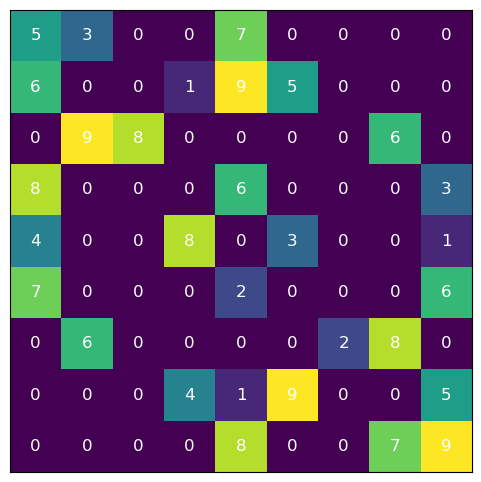


Solving...

Solved Sudoku puzzle:


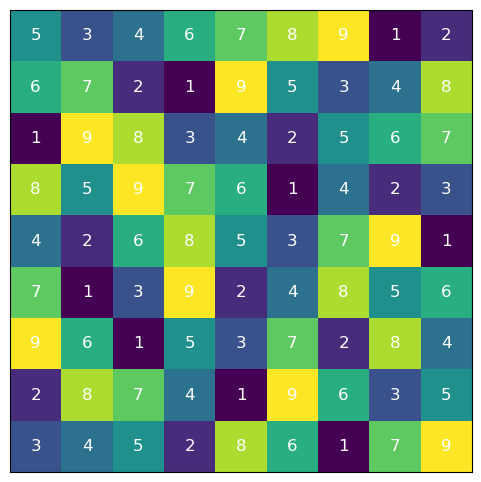

In [11]:
def get_user_input():
    print("Enter the Sudoku puzzle (use 0 to represent empty cells):")
    board = []
    for _ in range(9):
        row = input("Enter a row (9 numbers, separated by space): ").split()
        row = [int(cell) for cell in row]
        board.append(row)
    return np.array(board)

# Get input Sudoku puzzle from the user
board = get_user_input()

print("\nUnsolved Sudoku puzzle:")
display_sudoku(board)

print("\nSolving...")
solve_sudoku(board)

print("\nSolved Sudoku puzzle:")
display_sudoku(board)